In [11]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.images.shape)

(1797, 8, 8)


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following famil

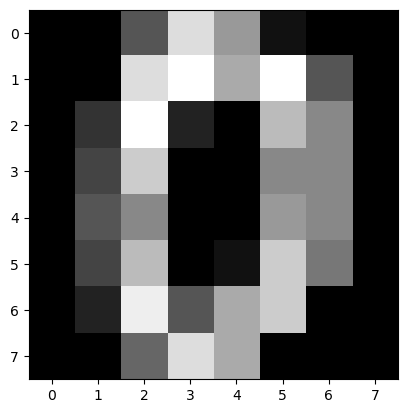

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following famil

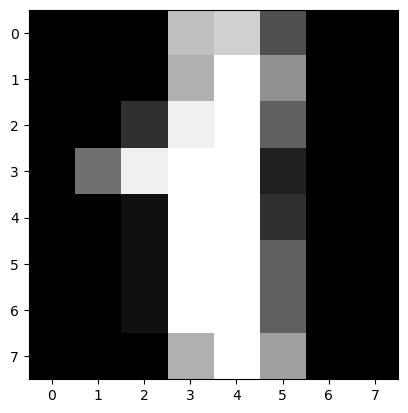

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following famil

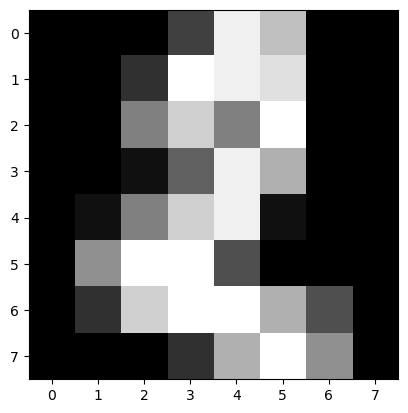

In [12]:
# 显示图片
from matplotlib import pyplot as plt
plt.imshow(digits.images[0],cmap='gray')
plt.show()
plt.imshow(digits.images[1],cmap='gray')
plt.show()
plt.imshow(digits.images[2],cmap='gray')
plt.show()

In [13]:
# 数据
X = digits.data
# 标签
y = digits.target
print(X.shape)
print(y.shape)
print(X[:3])
print(y[:3])

(1797, 64)
(1797,)
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]]
[0 1 2]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
# 数据切分
# 默认：1/4为测试集，3/4为训练集
X_train,X_test,y_train,y_test = train_test_split(X,y)
print(X_train.shape)
print(X_test.shape)

# 标签二值化 
# 0->1000000000
# 3->0001000000
# 9->0000000001
labels_train = LabelBinarizer().fit_transform(y_train)
print(y_train[:5])
print(labels_train[:5])

(1347, 64)
(450, 64)
[0 3 9 1 2]
[[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]]


In [15]:
import numpy as np
# 定义一个神经网络，结构：64-100-10
# 定义输入层到隐藏层之间的权值矩阵，数值范围-1到1
V = np.random.random((64,100))*2-1
# 定义隐藏层到输出层之间的权值矩阵
W = np.random.random((100,10))*2-1

In [16]:
# 激活函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 激活函数的导数
def dsigmoid(x):
    return x*(1-x)

# 训练模型
def train(X,y,steps=10000,lr=0.11):
    global V,W
    for n in range(steps+1):
        # 随机选取一个数据
        i = np.random.randint(X.shape[0])
        # 获取一个数据
        x = X[i]
        x = np.atleast_2d(x)
        # BP算法公式
        # 计算隐藏层的输出
        L1 = sigmoid(np.dot(x,V))
        # 计算输出的输出
        L2 = sigmoid(np.dot(L1,W))
        # 计算L2_delta，L1_delta
        L2_delta = (y[i]-L2)*dsigmoid(L2)
        L1_delta = L2_delta.dot(W.T)*dsigmoid(L1)
        # 更新权值
        W += lr*L1.T.dot(L2_delta)
        V += lr*x.T.dot(L1_delta)
        
        # 每训练1000次预测一次准确率
        if n%1000==0:
            output = predict(X_test)
            predictions = np.argmax(output,axis=1)
            acc = np.mean(np.equal(predictions,y_test))
            print('steps:',n,'accuracy:',acc)

def predict(x):
    # 计算隐藏层的输出
    L1 = sigmoid(np.dot(x,V))
    # 计算输出的输出
    L2 = sigmoid(np.dot(L1,W))
    return L2

In [17]:
train(X_train,labels_train,30000)

steps: 0 accuracy: 0.11333333333333333
steps: 1000 accuracy: 0.6288888888888889
steps: 2000 accuracy: 0.72
steps: 3000 accuracy: 0.8533333333333334
steps: 4000 accuracy: 0.8955555555555555
steps: 5000 accuracy: 0.9066666666666666
steps: 6000 accuracy: 0.8866666666666667
steps: 7000 accuracy: 0.92
steps: 8000 accuracy: 0.94
steps: 9000 accuracy: 0.9466666666666667
steps: 10000 accuracy: 0.9377777777777778
steps: 11000 accuracy: 0.9511111111111111
steps: 12000 accuracy: 0.94
steps: 13000 accuracy: 0.9422222222222222
steps: 14000 accuracy: 0.9444444444444444
steps: 15000 accuracy: 0.9444444444444444
steps: 16000 accuracy: 0.9555555555555556
steps: 17000 accuracy: 0.9577777777777777
steps: 18000 accuracy: 0.9466666666666667
steps: 19000 accuracy: 0.9555555555555556
steps: 20000 accuracy: 0.9444444444444444
steps: 21000 accuracy: 0.9444444444444444
steps: 22000 accuracy: 0.9488888888888889
steps: 23000 accuracy: 0.9488888888888889
steps: 24000 accuracy: 0.9577777777777777
steps: 25000 accur

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
output = predict(X_test)
predictions = np.argmax(output,axis=1)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.89      0.94        47
           2       1.00      0.97      0.99        40
           3       1.00      0.98      0.99        46
           4       0.98      0.93      0.95        44
           5       0.98      0.96      0.97        45
           6       0.96      1.00      0.98        46
           7       0.98      0.94      0.96        48
           8       0.89      1.00      0.94        40
           9       0.89      0.95      0.92        42

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following famil

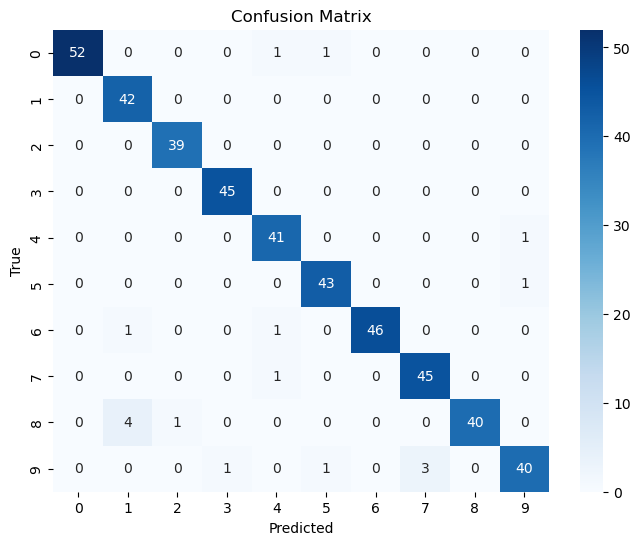

In [19]:
# 混淆矩阵
import matplotlib.pyplot as plt
import seaborn as sns

# 计算混淆矩阵
cm = confusion_matrix(y_test, predictions)

# 绘制混淆矩阵热力图
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
